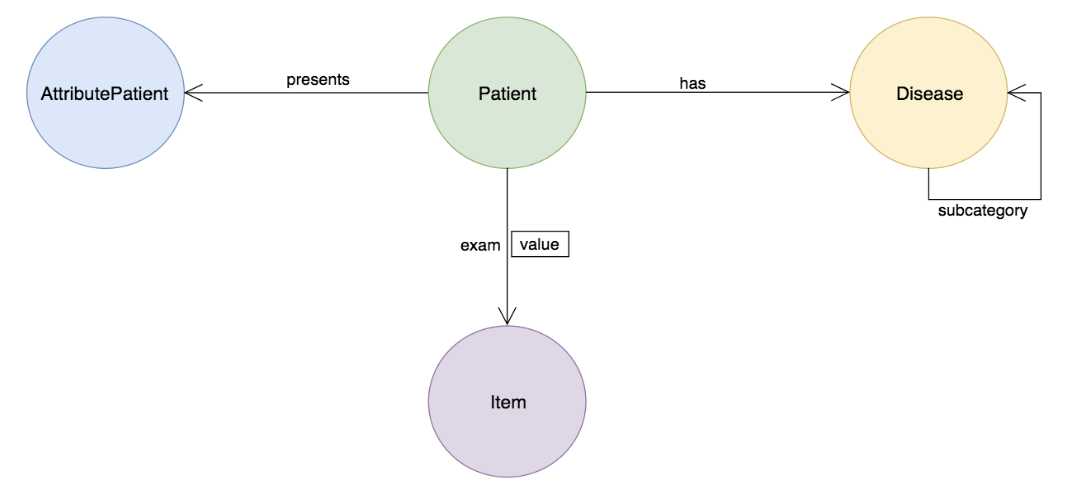

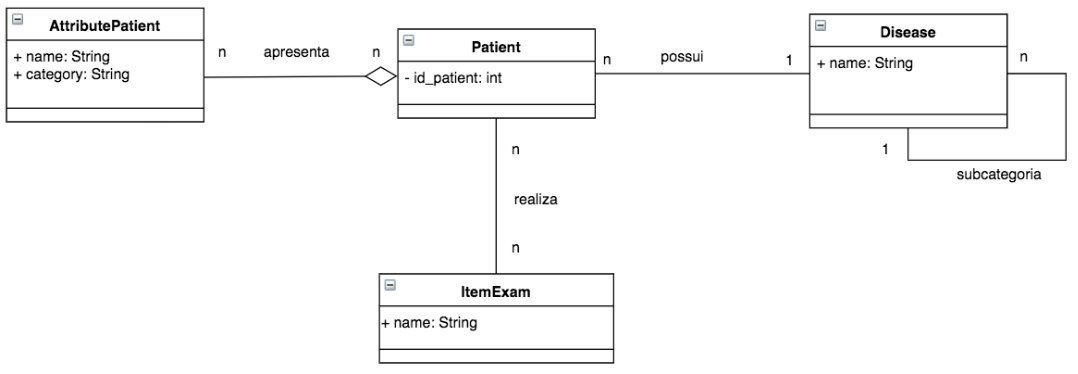

DISEASE (id_disease, name)

ITEM (id_item, name)

PATIENT (id_patient)

ATTRIBUTE_PATIENT(id_attribute, name)

EXAM(id_patient, id_item, value)
CHE: id_patient para PATIENT(id_patient)
CHE: id_item para ITEM(id_item)

HAS(id_patient, id_disease)
CHE: id_patient para PATIENT(id_patient)
CHE: id_disease para DISEASE(id_disease)

PRESENTS(id_patient, id_attributte)
CHE: id_patient para PATIENT(id_patient)
CHE: id_attributte para ATTRIBUTE_PATIENT(id_attributte)

-- Doencas


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease4.csv' AS line
CREATE (:Disease { name: line.category, id: line.id_disease})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease3.csv' AS line
CREATE (:Disease { name: line.name})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/disease4.csv' AS line
MATCH (d1:Disease {name: line.name})
MATCH (d2:Disease {id: line.id_disease})
CREATE (d2)-[:Super]->(d1)

-- Paciente:


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv'
AS line
CREATE (:PatientAll { id: line.id_patient})


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv'
AS line
MATCH (p1:PatientAll {id: line.id_patient}) WHERE (line.id_disease) =~ 'dis.*'
CREATE (p2: Patient {id: line.id_patient})


MATCH(p: PatientAll)
DELETE (p)


-- Paciente -> Doenca


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/patient.csv' AS line
MATCH (p:Patient { id: line.id_patient})
MATCH (d:Disease {id: line.id_disease})
CREATE (p)-[:Has]->(d)


-- Itens


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/item3.csv'
AS line
CREATE (:Item {id: line.id_item, name: line.name})


-- Paciente -> Item


LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/item_novo3.csv'
AS line
MATCH(p: Patient {id: line.id_patient})
MATCH(i: Item {name: line.name})
WHERE line.result = 't'
CREATE (p)-[:HasItem{value: line.value}]->(i)


-- Atributos

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/attribute.csv'
AS line
CREATE (:Attribute {name: line.name})

-- Aresta Atributos gerais
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: line.name}) WHERE line.result = 't' CREATE (p)-[:HasAttribute]->(a)

-- Aresta Atributo Idade:
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: line.name}) WHERE line.name = 'age' and line.result <> '?'
CREATE (p)-[:HasAttribute {value: line.result}]->(a)

-- Aresta Atributo Sexo feminino
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: 'female'}) WHERE line.name = 'sex' and line.result = 'F'
CREATE (p)-[:HasAttribute]->(a)

-- Aresta Atributo Sexo masculino
LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/VitoriaDMP/Chronos_Parte_1/master/dados/aresta_atributo.csv' AS line MATCH(p: Patient {id: line.idpaciente}) MATCH(a: Attribute {name: 'male'}) WHERE line.name = 'sex' and line.result = 'M'
CREATE (p)-[:HasAttribute]->(a)
